In [111]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier , DecisionTreeRegressor 
from sklearn.naive_bayes import check_non_negative
from sklearn.svm import SVC  , LinearSVC
import matplotlib.pyplot as plt
 


In [112]:
df = pd.read_csv('kidney_disease.csv')

In [113]:
df.head(3)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd


In [114]:
# Data Preprocessing: Replace "?" with NaN for easier handling of missing values
df.replace('?', pd.NA, inplace=True)

In [115]:
# Convert numeric columns to proper types
numeric_columns = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [116]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                106
rc                131
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [117]:
df.drop_duplicates().sum()

C:\Users\HP\AppData\Local\Temp\ipykernel_10152\3256134620.py:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.drop_duplicates().sum()


id                                                            79800
age                                                         20130.0
bp                                                          29670.0
sg                                                          359.145
al                                                            360.0
su                                                            158.0
bgr                                                         52701.0
bu                                                          21879.2
sc                                                          1176.75
sod                                                         43046.5
pot                                                          1443.7
hemo                                                         4359.2
pcv                                                         12793.0
wc                                                        2471400.0
rc                                              

In [118]:
df.dropna()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29.0,12100.0,3.7,yes,yes,no,poor,no,yes,ckd
11,11,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,...,32.0,4500.0,3.8,yes,yes,no,poor,yes,no,ckd
14,14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,...,16.0,11000.0,2.6,yes,yes,yes,poor,yes,no,ckd
20,20,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,...,24.0,9200.0,3.2,yes,yes,yes,poor,yes,yes,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


In [119]:
df.droplevel

<bound method NDFrame.droplevel of       id   age    bp     sg   al   su     rbc        pc         pcc  \
0      0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent   
1      1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent   
2      2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent   
3      3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present   
4      4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent   
..   ...   ...   ...    ...  ...  ...     ...       ...         ...   
395  395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
396  396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent   
397  397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
398  398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent   
399  399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent   

             ba  ...   pcv      wc   rc  htn   dm  cad  appet   pe  ane  \
0    notpresent  ...  44.0  7800.0  5

In [120]:
df.shape

(400, 26)

In [121]:
df.isnull()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
397,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
398,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [122]:
df.head(3)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd


In [123]:
df.fillna

<bound method DataFrame.fillna of       id   age    bp     sg   al   su     rbc        pc         pcc  \
0      0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent   
1      1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent   
2      2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent   
3      3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present   
4      4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent   
..   ...   ...   ...    ...  ...  ...     ...       ...         ...   
395  395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
396  396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent   
397  397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
398  398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent   
399  399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent   

             ba  ...   pcv      wc   rc  htn   dm  cad  appet   pe  ane  \
0    notpresent  ...  44.0  7800.0  5.

In [124]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             329 non-null    float64
 17  wc              294 non-null    flo

In [126]:
df.head(3)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd


In [127]:
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")


# Exploratory Data Analysis (EDA)

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wc       106
rc       131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
dtype: int64


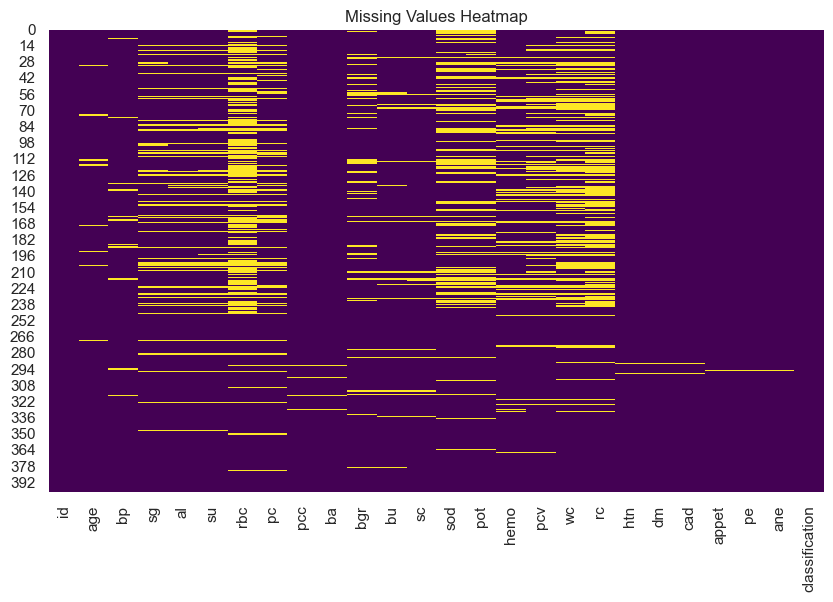

In [128]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Visualize missing values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


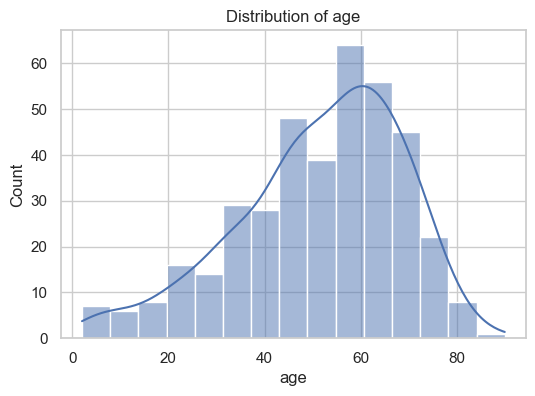

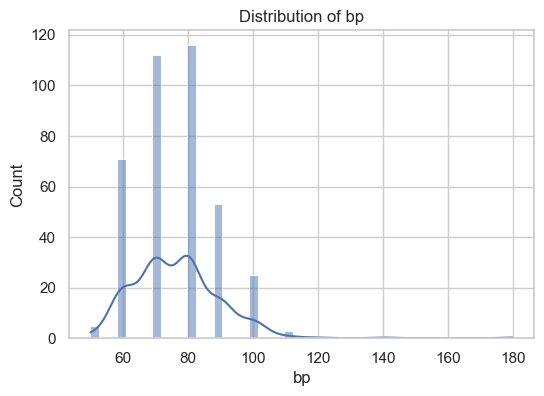

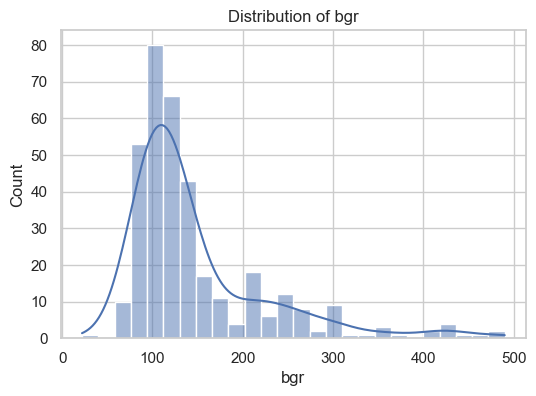

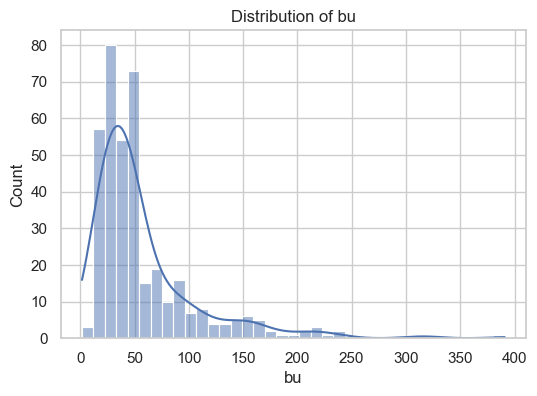

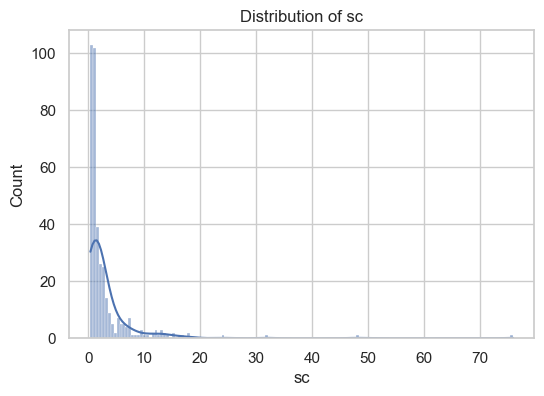

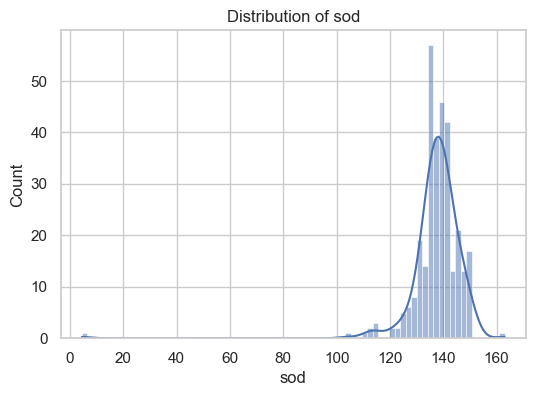

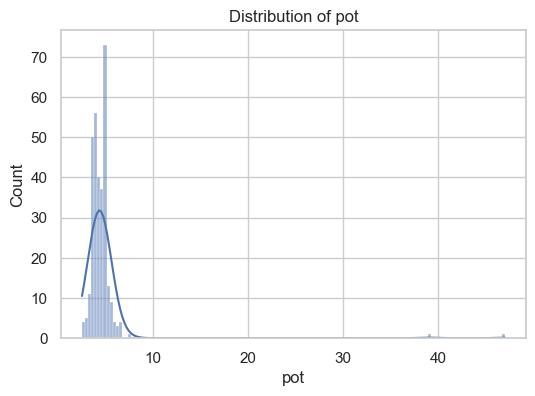

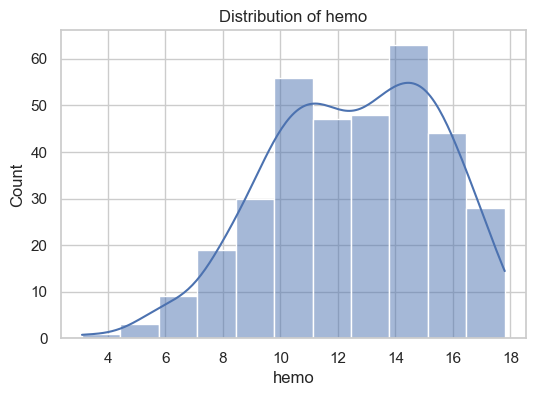

In [129]:
# Plot distribution of numerical features
numerical_features = ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']
for feature in numerical_features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[feature].dropna(), kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()


## 2  Bivariate Analysis (Correlation and Target Distribution)

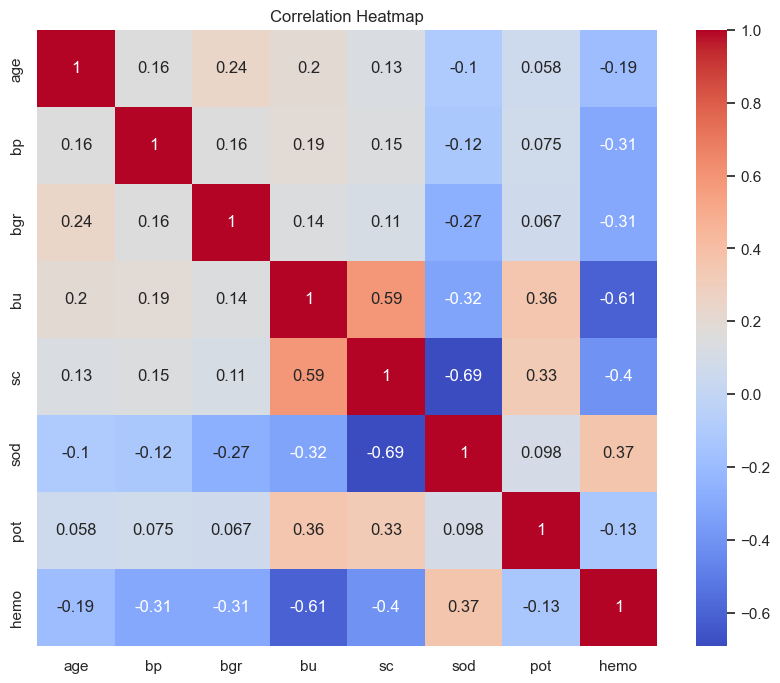

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


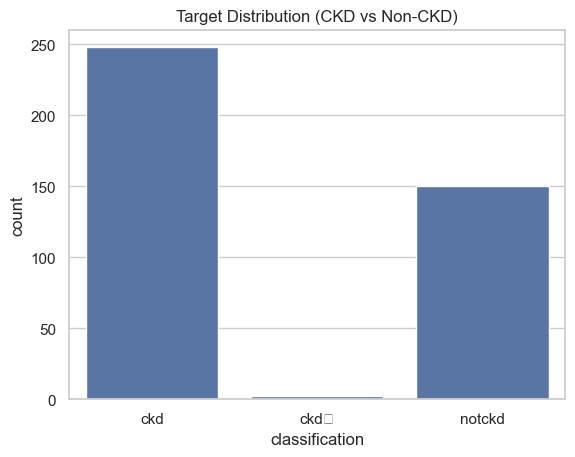

In [130]:
# Correlation matrix for numerical variables
plt.figure(figsize=(10,8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Visualize target distribution
sns.countplot(x='classification', data=df)
plt.title("Target Distribution (CKD vs Non-CKD)")
plt.show()


## Categorical Encoding

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


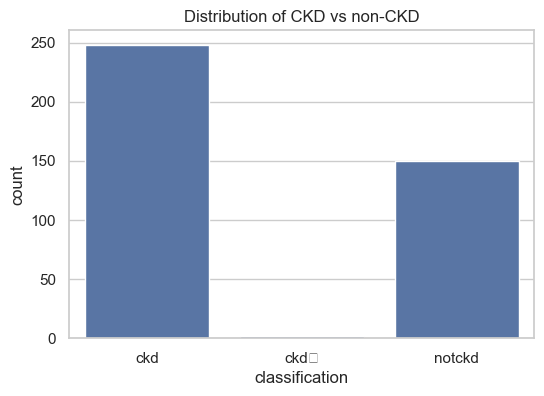

In [131]:
# Step 1: Distribution of Target Variable (Classification)
plt.figure(figsize=(6,4))
sns.countplot(x='classification', data=df)
plt.title('Distribution of CKD vs non-CKD')
plt.show()

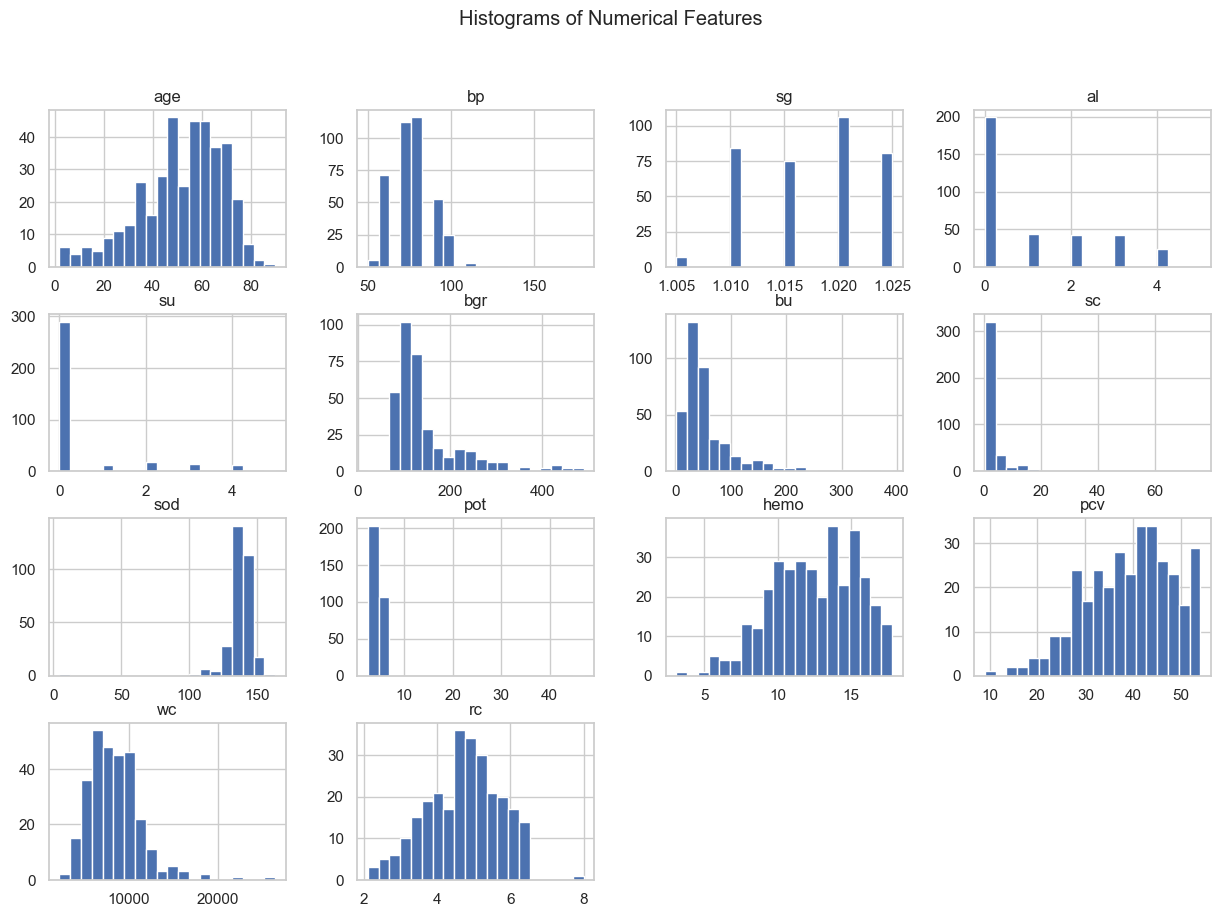

In [132]:
# Step 2: Histograms for Numerical Features
df[numeric_columns].hist(figsize=(15, 10), bins=20)
plt.suptitle('Histograms of Numerical Features')
plt.show()

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


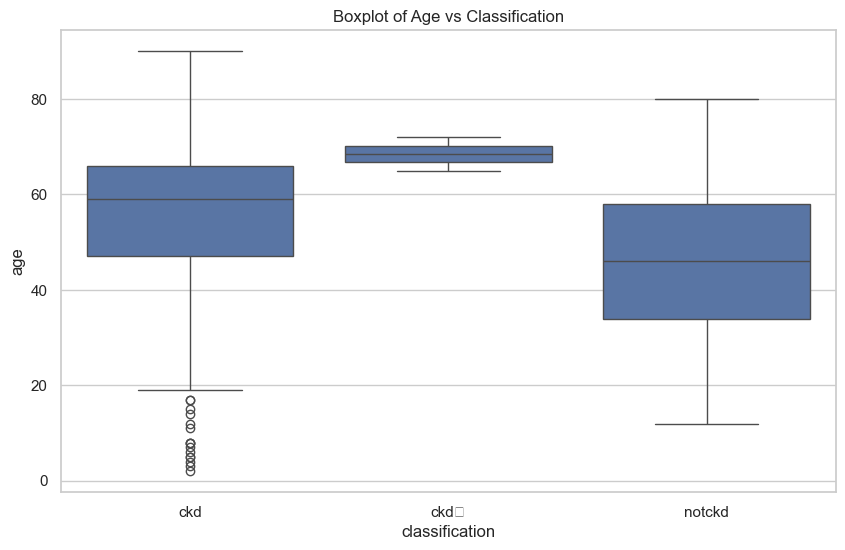

In [133]:
# Step 3: Boxplot of Numerical Features vs. Classification
plt.figure(figsize=(10,6))
sns.boxplot(x='classification', y='age', data=df)
plt.title('Boxplot of Age vs Classification')
plt.show()

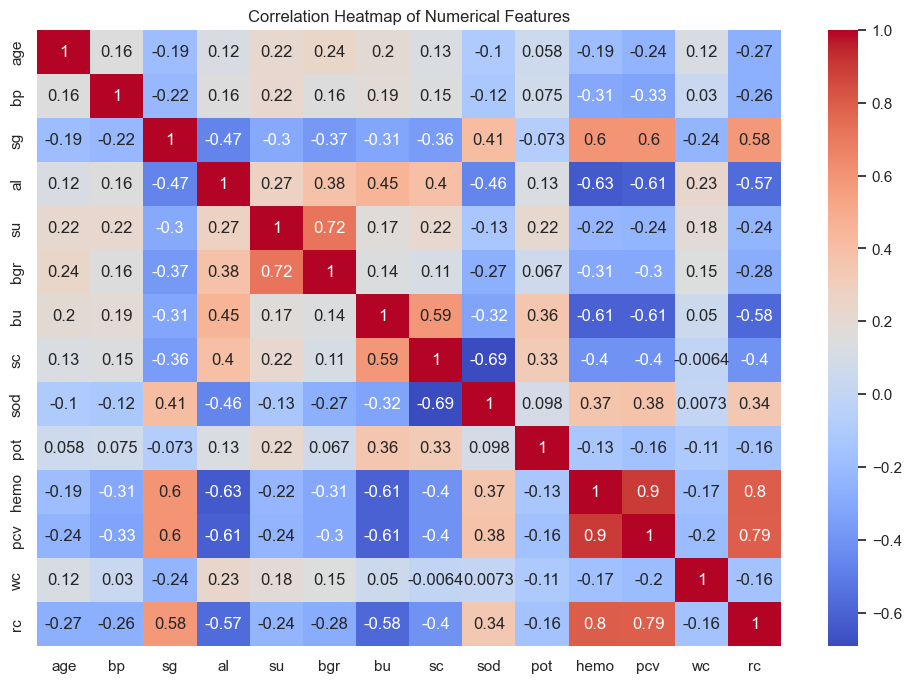

In [134]:
# Step 4: Correlation Heatmap
plt.figure(figsize=(12,8))
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


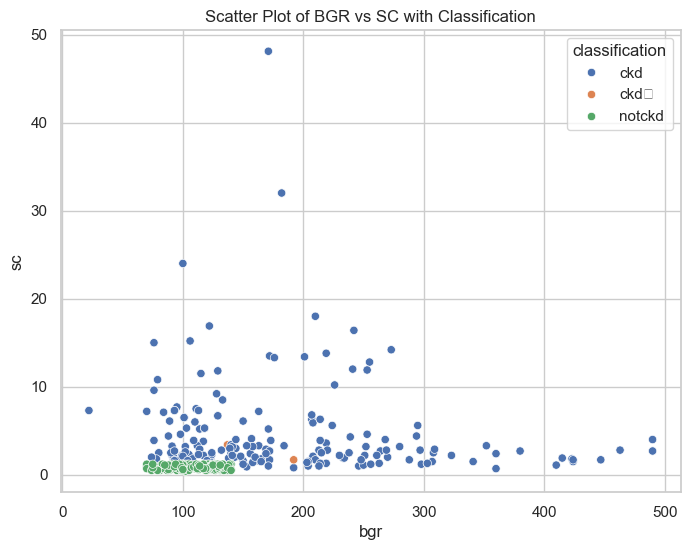

In [135]:
# Step 5: Scatter Plot Example (e.g., 'bgr' vs 'sc')
plt.figure(figsize=(8,6))
sns.scatterplot(x='bgr', y='sc', hue='classification', data=df)
plt.title('Scatter Plot of BGR vs SC with Classification')
plt.show()


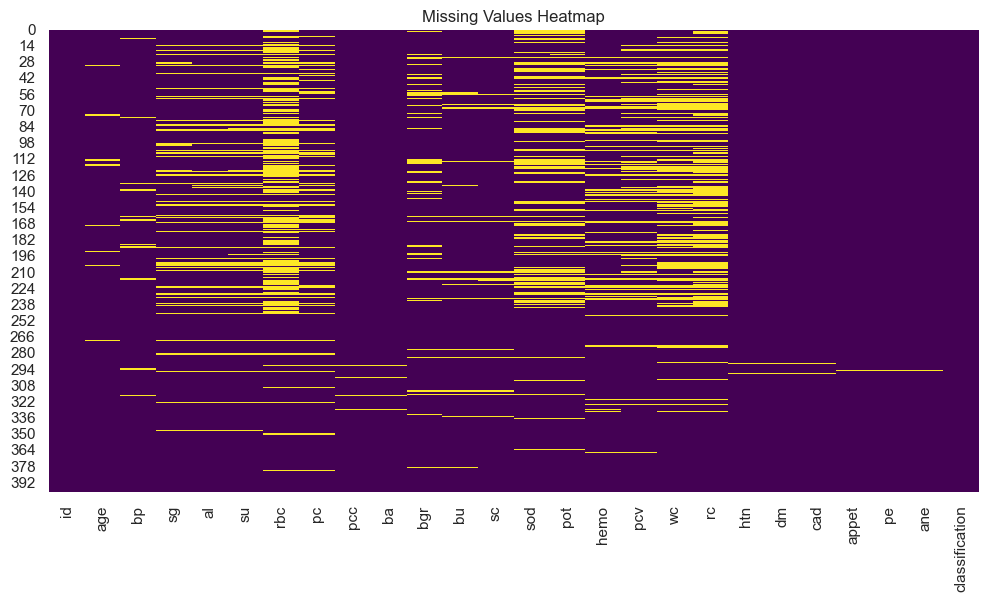

In [136]:
# Step 6: Heatmap of Missing Values
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_10152\4178448543.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['classification'] == 'ckd']['age'].dropna(), label="CKD", shade=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_10152\4178448543.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['classification'] == 'notckd']['age'].dropna(), label="Non-CKD", shade=True)


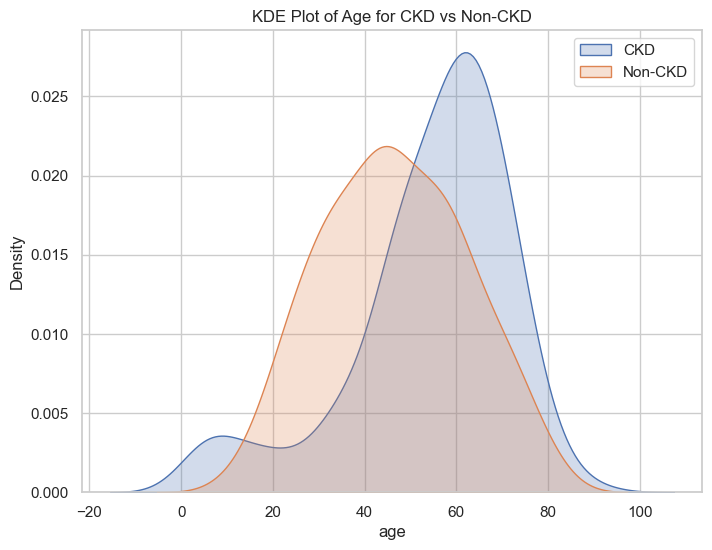

In [137]:
# Step 7: KDE Plot for Feature Comparison (Age) - Only using valid numeric values
df['age'] = pd.to_numeric(df['age'], errors='coerce')  # Ensure 'age' is numeric

plt.figure(figsize=(8,6))
sns.kdeplot(df[df['classification'] == 'ckd']['age'].dropna(), label="CKD", shade=True)
sns.kdeplot(df[df['classification'] == 'notckd']['age'].dropna(), label="Non-CKD", shade=True)
plt.title('KDE Plot of Age for CKD vs Non-CKD')
plt.legend()
plt.show()

In [138]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [139]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


In [140]:
# Impute remaining categorical/discrete columns using the mode
categorical_remaining_columns = ['sg', 'al', 'su']
df[categorical_remaining_columns] = df[categorical_remaining_columns].fillna(df[categorical_remaining_columns].mode().iloc[0])


In [141]:

# Let's check once again to ensure no missing values remain
df.isnull().sum()


id                  0
age                 9
bp                 12
sg                  0
al                  0
su                  0
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                106
rc                131
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

## 4. Feature Engineering

In [184]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

pcv     71
wc     106
rc     131
dtype: int64


In [189]:
# Impute missing numerical data with the median
for column in numerical_features:
    df[column].fillna(df[column].median(), inplace=True)

# Impute missing categorical data with mode
categorical_columns = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)


In [192]:
# Strip any leading/trailing whitespace from column names
df.columns = df.columns.str.strip()

# Check column names again
print(df.columns)


Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane'],
      dtype='object')


In [197]:
# Strip spaces from all column names
df.columns = df.columns.str.strip()

# Display column names again to check
print(df.columns)


Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane'],
      dtype='object')


In [199]:
# Check for missing values
print(df.isnull().sum())

age        0
bp         0
sg         0
al         0
su         0
rbc        0
pc         0
pcc        0
ba         0
bgr        0
bu         0
sc         0
sod        0
pot        0
hemo       0
pcv       71
wc       106
rc       131
htn        0
dm         0
cad        0
appet      0
pe         0
ane        0
dtype: int64


In [200]:
# Fill missing numerical columns with their median value
df.fillna(df.median(numeric_only=True), inplace=True)

# For categorical columns, fill missing values with the most frequent value (mode)
for column in df.select_dtypes(include=['object']).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Check if all missing values are handled
print(df.isnull().sum())


age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wc       0
rc       0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
dtype: int64


In [201]:
# Strip any leading/trailing whitespace from column names
df.columns = df.columns.str.strip()

# Display cleaned column names
print(df.columns)


Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane'],
      dtype='object')


In [202]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns (non-numeric data types)
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply LabelEncoder to each categorical column
le = LabelEncoder()
for column in categorical_columns:
    df[column] = le.fit_transform(df[column])

# Verify the transformation
print(df.head())


    age    bp     sg   al   su  rbc  pc  pcc  ba    bgr  ...  hemo   pcv  \
0  48.0  80.0  1.020  1.0  0.0    1   1    0   0  121.0  ...  15.4  44.0   
1   7.0  50.0  1.020  4.0  0.0    1   1    0   0  121.0  ...  11.3  38.0   
2  62.0  80.0  1.010  2.0  3.0    1   1    0   0  423.0  ...   9.6  31.0   
3  48.0  70.0  1.005  4.0  0.0    1   0    1   0  117.0  ...  11.2  32.0   
4  51.0  80.0  1.010  2.0  0.0    1   1    0   0  106.0  ...  11.6  35.0   

       wc   rc  htn  dm  cad  appet  pe  ane  
0  7800.0  5.2    1   4    1      0   0    0  
1  6000.0  4.8    0   3    1      0   0    0  
2  7500.0  4.8    0   4    1      1   0    1  
3  6700.0  3.9    1   3    1      1   1    1  
4  7300.0  4.6    0   3    1      0   0    0  

[5 rows x 24 columns]


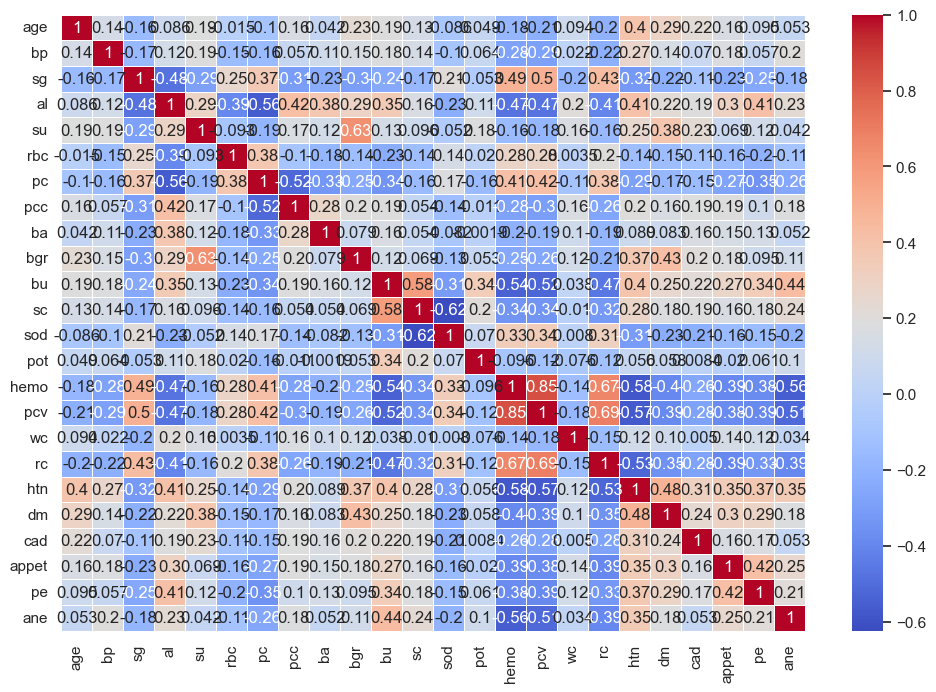

In [203]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()


In [223]:
# # Convert categorical columns to numeric (label encoding)
# from sklearn.preprocessing import LabelEncoder

# label_enc_columns = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']
# for column in label_enc_columns:
#     le = LabelEncoder()
#     df[column] = le.fit_transform(df[column])


In [224]:
# # Drop columns with too many missing values or irrelevant data
# df.drop(['id'],  inplace=True , axis=1)
# # Check the correlation matrix again to identify highly correlated features
# correlation_matrix = df.corr()

# # Drop features with high multicollinearity (if any)


In [225]:
# new_df = df.drop_duplicates()
# double_new_df = df.dropna()

In [233]:
print(df.columns.tolist())


['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']


In [234]:
df.columns = df.columns.str.strip()
print(df.columns)

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane'],
      dtype='object')


In [237]:
from sklearn.preprocessing import LabelEncoder

# Check for categorical columns (non-numeric data types)
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply LabelEncoder to each categorical column
le = LabelEncoder()
for column in categorical_columns:
    df[column] = le.fit_transform(df[column])

# Now check the dataset again after encoding
print(df.head())

    age    bp     sg   al   su  rbc  pc  pcc  ba    bgr  ...  hemo   pcv  \
0  48.0  80.0  1.020  1.0  0.0    1   1    0   0  121.0  ...  15.4  44.0   
1   7.0  50.0  1.020  4.0  0.0    1   1    0   0  121.0  ...  11.3  38.0   
2  62.0  80.0  1.010  2.0  3.0    1   1    0   0  423.0  ...   9.6  31.0   
3  48.0  70.0  1.005  4.0  0.0    1   0    1   0  117.0  ...  11.2  32.0   
4  51.0  80.0  1.010  2.0  0.0    1   1    0   0  106.0  ...  11.6  35.0   

       wc   rc  htn  dm  cad  appet  pe  ane  
0  7800.0  5.2    1   4    1      0   0    0  
1  6000.0  4.8    0   3    1      0   0    0  
2  7500.0  4.8    0   4    1      1   0    1  
3  6700.0  3.9    1   3    1      1   1    1  
4  7300.0  4.6    0   3    1      0   0    0  

[5 rows x 24 columns]


In [305]:
# Define features and target variable
X = df.drop('cad', axis=1)  # Features (replace 'ckd' with the actual target column name)
y = df['cad']  # Target variable (replace 'ckd' with the actual target column name)

# Display shapes of X and y
print(f"\nFeatures Shape: {X.shape}")
print(f"Target Shape: {y.shape}")



Features Shape: (400, 25)
Target Shape: (400,)


In [306]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining Feature Shape: {X_train.shape}")
print(f"Testing Feature Shape: {X_test.shape}")
print(f"Training Target Shape: {y_train.shape}")
print(f"Testing Target Shape: {y_test.shape}")



Training Feature Shape: (320, 25)
Testing Feature Shape: (80, 25)
Training Target Shape: (320,)
Testing Target Shape: (80,)


In [307]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")

# Display confusion matrix and classification report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Model Accuracy: 91.25%

Confusion Matrix:
[[73  0]
 [ 7  0]]

Classification Report:
              precision    recall  f1-score   support

           1       0.91      1.00      0.95        73
           2       0.00      0.00      0.00         7

    accuracy                           0.91        80
   macro avg       0.46      0.50      0.48        80
weighted avg       0.83      0.91      0.87        80



c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

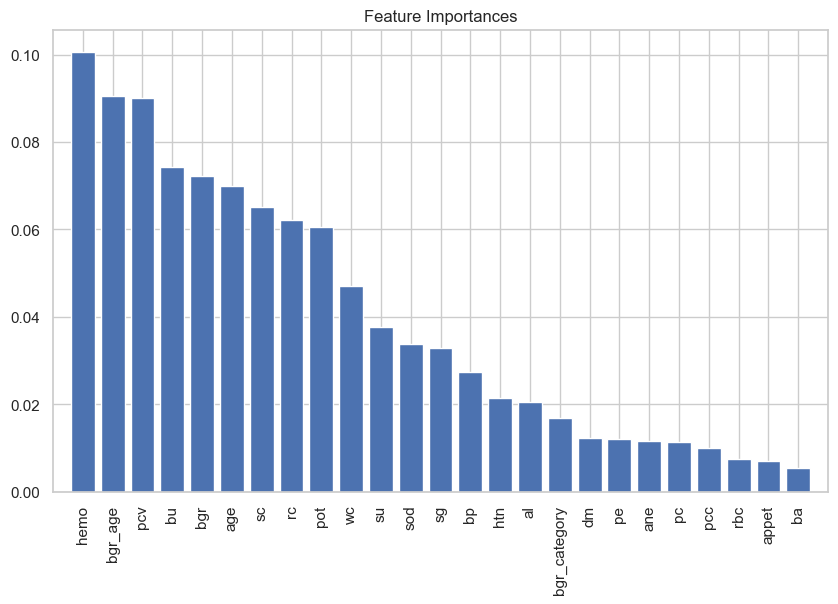

In [308]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
feature_importances = model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


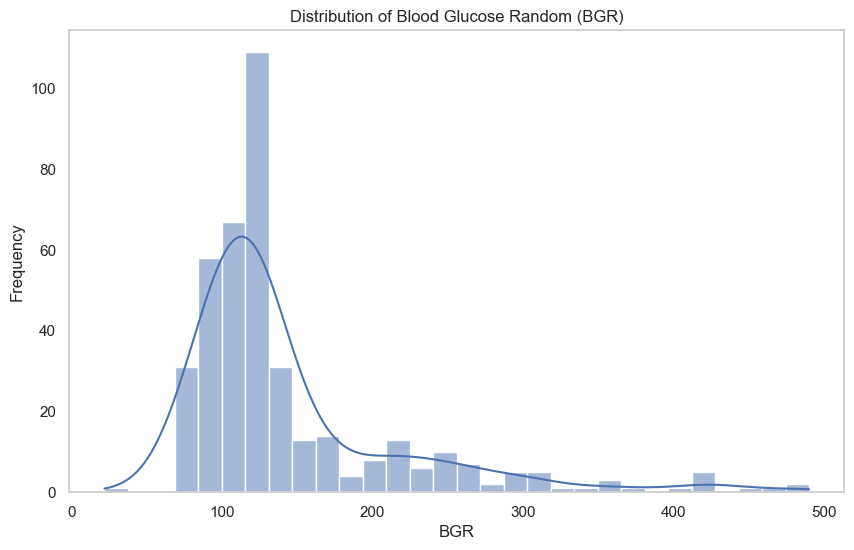


BGR Statistics:
count    400.000000
mean     145.062500
std       75.260774
min       22.000000
25%      101.000000
50%      121.000000
75%      150.000000
max      490.000000
Name: bgr, dtype: float64


In [309]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['bgr'], bins=30, kde=True)
plt.title('Distribution of Blood Glucose Random (BGR)')
plt.xlabel('BGR')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# Display basic statistics
print("\nBGR Statistics:")
print(df['bgr'].describe())


In [310]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'bgr_age', 'bgr_category'],
      dtype='object')

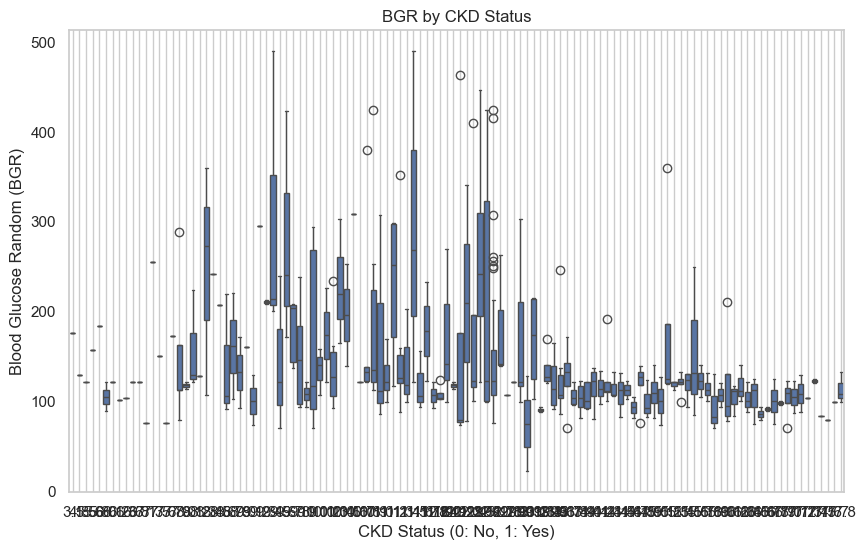

In [311]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='hemo', y='bgr', data=df)
plt.title('BGR by CKD Status')
plt.xlabel('CKD Status (0: No, 1: Yes)')
plt.ylabel('Blood Glucose Random (BGR)')
plt.grid()
plt.show()


In [312]:
# Example: Interaction feature
df['bgr_age'] = df['bgr'] * df['age']  # Assuming 'age' is one of the features


In [313]:
bins = [0, 140, 200, 300]  # Example bins for BGR
labels = ['Normal', 'Pre-Diabetic', 'Diabetic']
df['bgr_category'] = pd.cut(df['bgr'], bins=bins, labels=labels)

# Encode the new category feature
df['bgr_category'] = le.fit_transform(df['bgr_category'])


# Model Improvement

In [314]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}


In [315]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)
print(f"GBC Model Accuracy: {accuracy_score(y_test, y_pred_gbc) * 100:.2f}%")


GBC Model Accuracy: 90.00%


In [316]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_model, X, y, cv=5)
print(f"Cross-Validation Scores: {scores}")
print(f"Mean Cross-Validation Score: {scores.mean():.2f}")


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Scores: [0.9    0.875  0.9    0.9125 0.9   ]
Mean Cross-Validation Score: 0.90


In [317]:
print("Unique values in y_test:", np.unique(y_test))


Unique values in y_test: [1 2]


In [318]:
# Assuming '1' is one class (e.g., CKD) and '2' is the other (non-CKD)
y_test_binary = np.where(y_test == 1, 0, 1)  # Convert '1' to 0 and '2' to 1


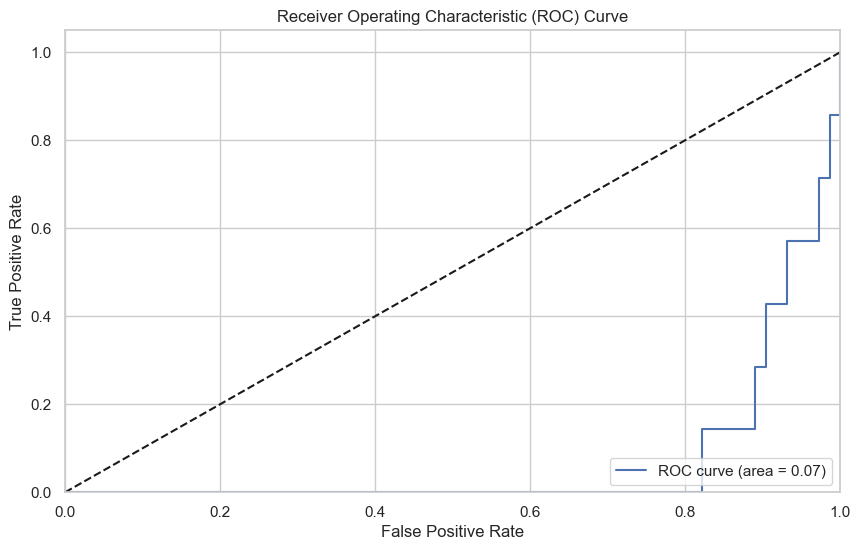

In [319]:
# Get probabilities for the positive class (CKD)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(y_test_binary, y_proba)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [320]:
import numpy as np

# Check unique classes in y_test
unique_classes = np.unique(y_test)
print("Unique classes in y_test:", unique_classes)
print("Number of unique classes:", len(unique_classes))


Unique classes in y_test: [1 2]
Number of unique classes: 2


In [321]:
# Get predicted probabilities
y_proba_multi = best_model.predict_proba(X_test)
print("Shape of y_proba_multi:", y_proba_multi.shape)


Shape of y_proba_multi: (80, 3)


In [322]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder and fit it on your y_test
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

# Check the mapping
print("Mapping of original to encoded classes:", dict(zip(label_encoder.classes_, range(len(label_encoder.classes_)))))


Mapping of original to encoded classes: {1: 0, 2: 1}


In [323]:
import numpy as np

unique_classes = np.unique(y_test_encoded)
print("Unique classes in y_test_encoded:", unique_classes)
print("Number of unique classes in y_test_encoded:", len(unique_classes))

Unique classes in y_test_encoded: [0 1]
Number of unique classes in y_test_encoded: 2


In [324]:
from sklearn.preprocessing import LabelEncoder

# If y_test is not numeric, use LabelEncoder to convert it
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

# Ensure you also apply the same transformation to your training set
y_train_encoded = label_encoder.fit_transform(y_train)  # if y_train is defined

# Check the mapping
class_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Mapping of original to encoded classes:", class_mapping)


Mapping of original to encoded classes: {0: 0, 1: 1, 2: 2}


In [325]:
from sklearn.linear_model import LogisticRegression

# Example model for multi-class classification
model = LogisticRegression(multi_class='ovr')  # or 'multinomial'
model.fit(X_train, y_train_encoded)  # Train the model


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='ovr')

In [326]:
print("Shape of y_test_encoded:", y_test_encoded.shape)
print("Shape of y_proba_multi:", y_proba_multi.shape)


Shape of y_test_encoded: (80,)
Shape of y_proba_multi: (80, 3)


In [327]:
unique_classes = np.unique(y_test_encoded)
print("Unique classes in y_test_encoded:", unique_classes)


Unique classes in y_test_encoded: [0 1]


In [328]:
# Check the mapping
class_mapping = {i: label for i, label in enumerate(label_encoder.classes_)}
print("Class mapping from indices to original classes:", class_mapping)


Class mapping from indices to original classes: {0: 0, 1: 1, 2: 2}


In [329]:
y_proba_multi = best_model.predict_proba(X_test)
print("Predicted probabilities (first 5 rows):", y_proba_multi[:5])


Predicted probabilities (first 5 rows): [[0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [9.37500000e-04 9.93295455e-01 5.76704545e-03]
 [3.72377622e-03 6.98985300e-01 2.97290924e-01]
 [1.41666667e-02 8.99038186e-01 8.67951473e-02]
 [2.64619825e-02 8.42022010e-01 1.31516007e-01]]


In [330]:
from sklearn.metrics import roc_auc_score

# Ensure y_test_encoded is correctly shaped and contains expected classes
if len(np.unique(y_test_encoded)) == y_proba_multi.shape[1]:
    roc_auc_multi = roc_auc_score(y_test_encoded, y_proba_multi, multi_class='ovr')
    print(f"Multi-class ROC AUC: {roc_auc_multi:.2f}")
else:
    print("Mismatch in the number of classes between y_test_encoded and y_proba_multi.")


Mismatch in the number of classes between y_test_encoded and y_proba_multi.


In [331]:
# from transformers import BertTokenizer, BertForSequenceClassification

# # Load BioBERT tokenizer and model for binary classification
# tokenizer = BertTokenizer.from_pretrained("dmis-lab/biobert-base-cased-v1.1")
# model = BertForSequenceClassification.from_pretrained("dmis-lab/biobert-base-cased-v1.1", num_labels=2)

# # Use tokenizer and model for your text data


In [332]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score


## 1. Random Forest Classifier

In [333]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and probability scores
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)

# Evaluation
print("Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))
# print("ROC AUC:", roc_auc_score(y_test, y_proba_rf, multi_class='ovr'))


Random Forest Classifier:
              precision    recall  f1-score   support

           1       0.91      1.00      0.95        73
           2       0.00      0.00      0.00         7

    accuracy                           0.91        80
   macro avg       0.46      0.50      0.48        80
weighted avg       0.83      0.91      0.87        80



c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

## 2. Logistic Regression

In [334]:
log_model = LogisticRegression(multi_class='ovr', solver='liblinear', random_state=42)
log_model.fit(X_train, y_train)

# Predictions and probability scores
y_pred_log = log_model.predict(X_test)
y_proba_log = log_model.predict_proba(X_test)

# Evaluation
print("Logistic Regression:")
print(classification_report(y_test, y_pred_log))
# print("ROC AUC:", roc_auc_score(y_test, y_proba_log, multi_class='ovr'))


Logistic Regression:
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        73
           2       1.00      0.14      0.25         7

    accuracy                           0.93        80
   macro avg       0.96      0.57      0.61        80
weighted avg       0.93      0.93      0.90        80



## 3. Support Vector Classifier

In [335]:
svc_model = SVC(probability=True, random_state=42)
svc_model.fit(X_train, y_train)

# Predictions and probability scores
y_pred_svc = svc_model.predict(X_test)
y_proba_svc = svc_model.predict_proba(X_test)

# Evaluation
print("Support Vector Classifier:")
print(classification_report(y_test, y_pred_svc))
# print("ROC AUC:", roc_auc_score(y_test, y_proba_svc, multi_class='ovr'))


Support Vector Classifier:
              precision    recall  f1-score   support

           1       0.91      1.00      0.95        73
           2       0.00      0.00      0.00         7

    accuracy                           0.91        80
   macro avg       0.46      0.50      0.48        80
weighted avg       0.83      0.91      0.87        80



c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [336]:
# Function to train and evaluate models
results = {}
def evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    # roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')

    # Store results
    results[model_name] = {
        'Accuracy': accuracy,
        # 'ROC AUC': roc_auc,
        'Classification Report': classification_report(y_test, y_pred, output_dict=True)
    }

In [337]:
# 1. Random Forest Classifier
evaluate_model(RandomForestClassifier(random_state=42), 'Random Forest')

# 2. Logistic Regression
evaluate_model(LogisticRegression(multi_class='ovr', solver='liblinear', random_state=42), 'Logistic Regression')

# 3. Support Vector Classifier
evaluate_model(SVC(probability=True, random_state=42), 'Support Vector Classifier')

# Step 3: Create a summary DataFrame for accuracy comparison
comparison_df = pd.DataFrame({
    'Model': results.keys(),
    'Accuracy': [result['Accuracy'] for result in results.values()],
    # 'ROC AUC': [result['ROC AUC'] for result in results.values()]
})

print("Model Comparison:")
print(comparison_df)

# Step 4: Print Classification Reports
for model_name, metrics in results.items():
    print(f"\n{(model_name)*100} Classification Report:")
    print(metrics['Classification Report'])


Model Comparison:
                       Model  Accuracy
0              Random Forest    0.9125
1        Logistic Regression    0.9250
2  Support Vector Classifier    0.9125

Random ForestRandom ForestRandom ForestRandom ForestRandom ForestRandom ForestRandom ForestRandom ForestRandom ForestRandom ForestRandom ForestRandom ForestRandom ForestRandom ForestRandom ForestRandom ForestRandom ForestRandom ForestRandom ForestRandom ForestRandom ForestRandom ForestRandom ForestRandom ForestRandom ForestRandom ForestRandom ForestRandom ForestRandom ForestRandom ForestRandom ForestRandom ForestRandom ForestRandom ForestRandom ForestRandom ForestRandom ForestRandom ForestRandom ForestRandom ForestRandom ForestRandom ForestRandom ForestRandom ForestRandom ForestRandom ForestRandom ForestRandom ForestRandom ForestRandom ForestRandom ForestRandom ForestRandom ForestRandom ForestRandom ForestRandom ForestRandom ForestRandom ForestRandom ForestRandom ForestRandom ForestRandom ForestRandom ForestRandom

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [ ]:
## Final Preciction Results 

## Final Prediction Results

In [341]:
import pandas as pd

# Define the columns based on your model's training features
feature_columns = [
    'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm',
    'cad', 'appet', 'pe', 'ane', 'ckd'
]

def create_input_features():
    # Create a DataFrame with the specified columns, initially with empty strings
    input_data = pd.DataFrame(columns=feature_columns)
    
    # Fill in the data manually (leave empty for manual input)
    # Example of how to structure the input
    input_data = input_data.append({
    'rbc': 'normal',
    'pc': 'normal',
    'pcc': 'normal',
    'ba': 'normal',
    'htn': 'no',
    'dm': 'no',
    'cad': 'no',
    'appet': 'good',
    'pe': 'no',
    'ane': 'no',
    'ckd': 'no'
}, ignore_index=True)

    return input_data

# Call the function to create the input features DataFrame
input_features = create_input_features()
print("Input Features for Prediction:")
print(input_features)


Input Features for Prediction:
      rbc      pc     pcc      ba htn  dm cad appet  pe ane ckd
0  normal  normal  normal  normal  no  no  no  good  no  no  no


C:\Users\HP\AppData\Local\Temp\ipykernel_10152\1519831962.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  input_data = input_data.append({


In [346]:
# Use the previously trained models to make predictions
rf_model = RandomForestClassifier(random_state=42).fit(X_train, y_train)
lr_model = LogisticRegression(multi_class='ovr', solver='liblinear', random_state=42).fit(X_train, y_train)
svc_model = SVC(probability=True, random_state=42).fit(X_train, y_train)

# Predict using the models
if not X_new.empty:
    rf_predictions = rf_model.predict(X_new)
    lr_predictions = lr_model.predict(X_new)
    svc_predictions = svc_model.predict(X_new)

    # Store predictions in a DataFrame
    predictions_df = pd.DataFrame({
        'Random Forest Predictions': rf_predictions,
        'Logistic Regression Predictions': lr_predictions,
        'SVC Predictions': svc_predictions
    })

    print("Predictions:")
    print(predictions_df)


In [350]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoders
le_rbc = LabelEncoder()
le_pc = LabelEncoder()
le_pcc = LabelEncoder()
le_ba = LabelEncoder()
le_htn = LabelEncoder()
le_dm = LabelEncoder()
le_cad = LabelEncoder()
le_appet = LabelEncoder()
le_pe = LabelEncoder()
le_ane = LabelEncoder()
le_ckd = LabelEncoder()

# Assuming you have a DataFrame `df` with the training data
# Fit label encoders to each feature
le_rbc.fit(df['rbc'])
le_pc.fit(df['pc'])
le_pcc.fit(df['pcc'])
le_ba.fit(df['ba'])
le_htn.fit(df['htn'])
le_dm.fit(df['dm'])
le_cad.fit(df['cad'])
le_appet.fit(df['appet'])
le_pe.fit(df['pe'])
le_ane.fit(df['ane'])
# le_ckd.fit(df['ckd'])  # Target variable

# If you had some unique categories in your target variable (like 'ckd' or 'not ckd'), make sure to fit the encoder for the target variable


LabelEncoder()

In [362]:
import joblib

# Save the trained model
joblib.dump(best_model, 'best_model.pkl')

# Save the label encoders
joblib.dump({
    'rbc': le_rbc,
    'pc': le_pc,
    'pcc': le_pcc,
    'ba': le_ba,
    'htn': le_htn,
    'dm': le_dm,
    'cad': le_cad,
    'appet': le_appet,
    'pe': le_pe,
    'ane': le_ane
}, 'label_encoders.pkl')

print("Model and label encoders saved successfully.")


Model and label encoders saved successfully.


In [363]:
import joblib
import pandas as pd

# Load the trained model and label encoders
best_model = joblib.load('best_model.pkl')
label_encoders = joblib.load('label_encoders.pkl')

# Function to encode input features safely
def encode_input_features(input_data):
    # Convert to DataFrame
    input_df = pd.DataFrame(input_data)

    # Encoding categorical features
    for feature, encoder in label_encoders.items():
        if feature in input_df.columns:
            # Check if the encoder has been fitted
            if encoder.classes_.size > 0:  # Ensure the encoder has classes
                # Try transforming and handle unseen labels
                try:
                    input_df[feature] = encoder.transform(input_df[feature])
                except ValueError:
                    # Use the most frequent class if an unseen label is encountered
                    most_frequent = encoder.classes_[0]  # Assuming the first class is the most common
                    input_df[feature] = input_df[feature].apply(
                        lambda x: encoder.transform([most_frequent])[0] if x not in encoder.classes_ else encoder.transform([x])[0]
                    )
            else:
                print(f"Encoder for {feature} is not fitted.")

    return input_df

# Function to create input features
def create_input_features():
    input_data = {
        'age': [50],            # Example age
        'bp': [80],             # Blood pressure
        'sg': [1.020],         # Specific gravity
        'al': [1],              # Albumin
        'su': [0],              # Sugar
        'rbc': ['normal'],      # Red blood cells
        'pc': ['normal'],       # Pus cell
        'pcc': ['normal'],      # Pus cell clumps
        'ba': ['no'],           # Bacteria
        'htn': ['no'],          # Hypertension
        'dm': ['no'],           # Diabetes
        'cad': ['no'],          # Coronary artery disease
        'appet': ['good'],      # Appetite
        'pe': ['no'],           # Pedal edema
        'ane': ['no']           # Anemia
    }
    
    encoded_input = encode_input_features(input_data)
    print("Encoded Input Features:\n", encoded_input)  # Debugging line
    return encoded_input

# Prepare input features
input_features = create_input_features()

# Make predictions using the loaded model
try:
    predictions = best_model.predict(input_features)
    print("Predicted Classes:", predictions)

    # Interpretation of prediction
    for prediction in predictions:
        if prediction == 1:  # Assuming '1' means 'ckd' and '0' means 'not ckd'
            print("The person is diagnosed with kidney disease.")
        else:
            print("The person is not diagnosed with kidney disease.")
except ValueError as e:
    print("Error during prediction:", e)

Encoded Input Features:
    age  bp    sg  al  su  rbc  pc  pcc  ba  htn  dm  cad  appet  pe  ane
0   50  80  1.02   1   0    0   0    0   0    0   0    0      0   0    0
Error during prediction: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- cad
Feature names seen at fit time, yet now missing:
- bgr
- bgr_age
- bgr_category
- bu
- hemo
- ...



C:\Users\HP\AppData\Local\Temp\ipykernel_10152\3381562079.py:25: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  lambda x: encoder.transform([most_frequent])[0] if x not in encoder.classes_ else encoder.transform([x])[0]
C:\Users\HP\AppData\Local\Temp\ipykernel_10152\3381562079.py:25: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  lambda x: encoder.transform([most_frequent])[0] if x not in encoder.classes_ else encoder.transform([x])[0]
C:\Users\HP\AppData\Local\Temp\ipykernel_10152\3381562079.py:25: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  lambda x: encoder.transform([most_frequent])[0] if x not in encoder.classes_ else encoder.transform([x])[0]
C:\Users\HP\AppData\Local\Temp\ipykernel_10152\3381562079.py:25: FutureWarning: elementwise compa